In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# for data splitting and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# for modeling
from sklearn.ensemble import RandomForestClassifier 

# Train.csv EDA (Exploratory Data Analysis)

In [4]:
#it will show every column in data frame
pd.set_option('display.max_columns',None)

In [5]:
# loading data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sample_submission = pd.read_csv('sample_submission.csv')

In [6]:
df_train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [7]:
df_train.dtypes

id                             int64
Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

In [8]:
df_train.shape

(18524, 9)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [10]:
df_train.duplicated().sum()  # checking for duplicates

0

In [11]:
df_train.isnull().sum()  # checking for nan/null values

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [12]:
# checking the skewness
df_train[['Time_spent_Alone', 'Social_event_attendance', 
          'Going_outside', 'Friends_circle_size', 'Post_frequency']].skew()

## Skewness Value	Shape
# ≈ 0	Symmetric (Normal)
# > 0	Right Skew (Positive)
# < 0	Left Skew (Negative)

Time_spent_Alone           1.133777
Social_event_attendance   -0.229238
Going_outside             -0.367221
Friends_circle_size       -0.051806
Post_frequency            -0.058706
dtype: float64

In [13]:
# we will use median for Time_spent_alone and mean for others

In [14]:
# filling the null/nan values of columns with int data types
df_train['Time_spent_Alone'].fillna(np.median(df_train['Time_spent_Alone'].dropna()), inplace= True)
df_train['Social_event_attendance'].fillna(np.mean(df_train['Social_event_attendance']),inplace=True)
df_train['Going_outside'].fillna(np.mean(df_train['Going_outside']),inplace=True)
df_train['Friends_circle_size'].fillna(np.mean(df_train['Friends_circle_size']),inplace=True)
df_train['Post_frequency'].fillna(np.mean(df_train['Post_frequency']),inplace=True)

# filling Categorical data 
df_train['Stage_fear'].fillna((df_train['Stage_fear']).mode()[0],inplace=True)
df_train['Drained_after_socializing'].fillna((df_train['Drained_after_socializing']).mode()[0],inplace=True)


C:\Users\AL Rehman Computer\AppData\Local\Temp\ipykernel_4020\2607609565.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Time_spent_Alone'].fillna(np.median(df_train['Time_spent_Alone'].dropna()), inplace= True)
C:\Users\AL Rehman Computer\AppData\Local\Temp\ipykernel_4020\2607609565.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermedi

In [15]:
df_train.isnull().sum()  # recheacking for nan/null values

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [16]:
# encoding categorical features

In [17]:
# encoding Stage_fear 
pd.get_dummies(df_train['Stage_fear'])
df_train['Stage_fear'] = df_train['Stage_fear'].map({'No':0,'Yes': 1})

In [18]:
# encoding Drained_after_socializing
pd.get_dummies(df_train['Drained_after_socializing'])
df_train['Drained_after_socializing'] = df_train['Drained_after_socializing'].map({'No':0,'Yes': 1})

In [19]:
# encoding Personality
pd.get_dummies(df_train['Personality'])
df_train['Personality'] = df_train['Personality'].map({'Introvert':0,'Extrovert': 1})

In [20]:
df_train.drop('id',axis=1 ,inplace=True)  # removing id its useless

In [21]:
df_train.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,0,6.0,4.0,0,15.0,5.000000,1
1,1.0,0,7.0,3.0,0,10.0,8.000000,1
2,6.0,1,1.0,0.0,0,3.0,0.000000,0
3,3.0,0,7.0,3.0,0,11.0,5.000000,1
4,1.0,0,4.0,4.0,0,13.0,4.982097,1


# Test.csv EDA (Exploratory Data Analysis)

In [22]:
df_test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [23]:
df_test.dtypes

id                             int64
Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
dtype: object

In [24]:
df_test.shape

(6175, 8)

In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           5750 non-null   float64
 2   Stage_fear                 5577 non-null   object 
 3   Social_event_attendance    5778 non-null   float64
 4   Going_outside              5709 non-null   float64
 5   Drained_after_socializing  5743 non-null   object 
 6   Friends_circle_size        5825 non-null   float64
 7   Post_frequency             5767 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 386.1+ KB


In [26]:
df_test.duplicated().sum() # checking for duplicates

0

In [27]:
df_test.isnull().sum () # checking for null/nan values

id                             0
Time_spent_Alone             425
Stage_fear                   598
Social_event_attendance      397
Going_outside                466
Drained_after_socializing    432
Friends_circle_size          350
Post_frequency               408
dtype: int64

In [28]:
# checking the skewness
df_test[['Time_spent_Alone', 'Social_event_attendance', 
          'Going_outside', 'Friends_circle_size', 'Post_frequency']].skew()

## Skewness Value	Shape
# ≈ 0	Symmetric (Normal)
# > 0	Right Skew (Positive)
# < 0	Left Skew (Negative)

Time_spent_Alone           1.153476
Social_event_attendance   -0.244361
Going_outside             -0.345359
Friends_circle_size       -0.064985
Post_frequency            -0.074961
dtype: float64

In [29]:
# we will use median for Time_spent_alone and mean for others

In [30]:
# filling the null/nan values of columns with int data types
df_test['Time_spent_Alone'].fillna(np.median(df_test['Time_spent_Alone'].dropna()), inplace= True)
df_test['Social_event_attendance'].fillna(np.mean(df_test['Social_event_attendance']),inplace=True)
df_test['Going_outside'].fillna(np.mean(df_test['Going_outside']),inplace=True)
df_test['Friends_circle_size'].fillna(np.mean(df_test['Friends_circle_size']),inplace=True)
df_test['Post_frequency'].fillna(np.mean(df_test['Post_frequency']),inplace=True)

# filling Categorical data 
df_test['Stage_fear'].fillna((df_test['Stage_fear']).mode()[0],inplace=True)
df_test['Drained_after_socializing'].fillna((df_test['Drained_after_socializing']).mode()[0],inplace=True)


C:\Users\AL Rehman Computer\AppData\Local\Temp\ipykernel_4020\3785373770.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Time_spent_Alone'].fillna(np.median(df_test['Time_spent_Alone'].dropna()), inplace= True)
C:\Users\AL Rehman Computer\AppData\Local\Temp\ipykernel_4020\3785373770.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediat

In [31]:
df_test.isnull().sum()   # rechecking for nan/null values

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
dtype: int64

In [32]:
# encoding of Categorical data

In [33]:
# encoding Stage_fear 
pd.get_dummies(df_test['Stage_fear'])
df_test['Stage_fear'] = df_test['Stage_fear'].map({'No':0,'Yes': 1})

In [34]:
# encoding Drained_after_socializing
pd.get_dummies(df_test['Drained_after_socializing'])
df_test['Drained_after_socializing'] = df_test['Drained_after_socializing'].map({'No':0,'Yes': 1})

In [35]:
df_test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,0,7.0,4.0,0,6.0,5.028958
1,18525,2.0,1,0.0,0.0,1,5.0,1.000000
2,18526,3.0,0,5.0,6.0,0,15.0,9.000000
3,18527,3.0,0,4.0,4.0,0,5.0,6.000000
4,18528,9.0,1,1.0,2.0,1,1.0,1.000000


# Training the train data

In [116]:
# splitting data into features and target
X = df_train.drop('Personality', axis=1)
y = df_train['Personality']

# splitting data into train and test 
X_train , X_val , y_train , y_val = train_test_split(X, y , test_size=0.2,stratify=y, random_state=42)

In [36]:
# instantiating model 
clf = RandomForestClassifier(random_state=42)
model = clf.fit(X_train,y_train)

# making prediction
y_pred = clf.predict(X_val)

# Evaluate Accuracy 
print(f"Vaidate Accuracy: {accuracy_score(y_val,y_pred):.6f}")

Vaidate Accuracy: 0.961943


# Checking Feature Importance 

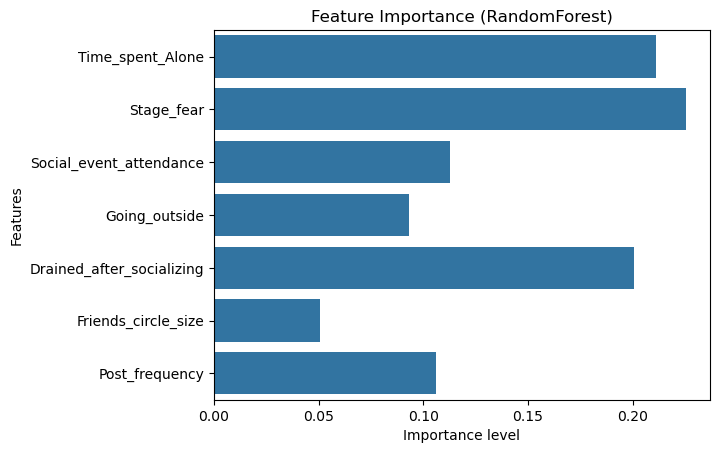

In [37]:
importances = clf.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title('Feature Importance (RandomForest)')
plt.ylabel('Features')
plt.xlabel('Importance level')
plt.show()

# Tuning 

In [38]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=1,
    verbose=2
)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; tota

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy', verbose=2)

In [41]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [42]:
# Evaluate best model on validation set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_val)

In [43]:
accuracy_best = accuracy_score(y_val, y_pred_best)
print(f'Tuned Validation Accuracy: {accuracy_best:.6f}')

Tuned Validation Accuracy: 0.965182


In [44]:
print(f"Vaidate Accuracy: {accuracy_score(y_val,y_pred):.6f}")

Vaidate Accuracy: 0.961943


# Applying finding on full data sets for results

In [36]:
df_train.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,0,6.0,4.0,0,15.0,5.000000,1
1,1.0,0,7.0,3.0,0,10.0,8.000000,1
2,6.0,1,1.0,0.0,0,3.0,0.000000,0
3,3.0,0,7.0,3.0,0,11.0,5.000000,1
4,1.0,0,4.0,4.0,0,13.0,4.982097,1


In [37]:
# Prepare full data (exclude 'id' and 'Personality')
X_full = df_train.drop('Personality',axis=1)
y_full = df_train['Personality']

# Create model with best parameters
final_rf = RandomForestClassifier(
    max_depth=5,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

# Train on full dataset
final_rf.fit(X_full, y_full)


RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=300,
                       random_state=42)

In [38]:
y_pred_train = final_rf.predict(X_full)
train_accuracy = accuracy_score(y_full, y_pred_train)
print(f'Accuracy on Full Training Data: {train_accuracy:.6f}')

Accuracy on Full Training Data: 0.969067


In [39]:
df_test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,0,7.0,4.0,0,6.0,5.028958
1,18525,2.0,1,0.0,0.0,1,5.0,1.000000
2,18526,3.0,0,5.0,6.0,0,15.0,9.000000
3,18527,3.0,0,4.0,4.0,0,5.0,6.000000
4,18528,9.0,1,1.0,2.0,1,1.0,1.000000


In [40]:
# Assuming your test dataset is df_test
X_test = df_test.drop(columns=['id'])
test_predictions = final_rf.predict(X_test)

In [41]:
submission = pd.DataFrame({
    'id': df_test['id'],
    'Personality': test_predictions
})

# Save to CSV
submission.to_csv('results.csv', index=False)

In [42]:
result = pd.read_csv('submission.csv')

In [43]:
result.head(10)

,id,Personality
0,18524,1
1,18525,0
2,18526,1
3,18527,1
4,18528,0
5,18529,1
6,18530,1
7,18531,0
8,18532,1
9,18533,0


In [44]:
# encoding personality 
result['Personality'] = result['Personality'].map({1: 'Extrovert', 0 : 'Introvert'})

In [45]:
result.head(10)

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
5,18529,Extrovert
6,18530,Extrovert
7,18531,Introvert
8,18532,Extrovert
9,18533,Introvert


In [46]:
result.to_csv('submission.csv', index=False)